In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('order_105747_data.txt', sep=";")

In [4]:
df["hto000d0"] = df['hto000d0'].replace('-',0)

In [5]:
df_arosa = df.loc[(df['stn'] == 'ARO')]
df_arosa['time'] = pd.to_datetime(df_arosa['time'], format='%Y%m%d')

/tmp/ipykernel_25281/1616028265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arosa['time'] = pd.to_datetime(df_arosa['time'], format='%Y%m%d')


In [6]:
df_arosa = df_arosa[(df_arosa['time'] > '1950-01-01') & (df_arosa['time'] < '2021-12-31')]

In [7]:
df_arosa['snow'] = df_arosa['hto000d0']

In [8]:
df_arosa = df_arosa[['time', 'snow']]
df_arosa['snow'] = pd.to_numeric(df_arosa['snow'])

[Text(0.5, 1.0, 'Snow Levels of Arosa')]

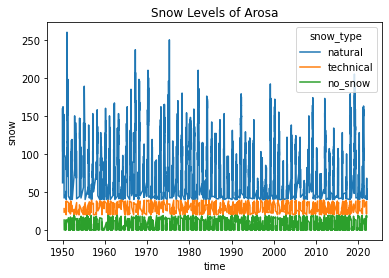

In [9]:
df_arosa.loc[df_arosa["snow"] >= 40, "snow_type"] = "natural"
df_arosa.loc[df_arosa["snow"] < 40, "snow_type"] = "no_snow"
df_arosa.loc[(df_arosa["snow"] < 40) & (df_arosa["snow"]>=20), "snow_type"] = "technical"
sns.lineplot(data=df_arosa, x='time', y='snow', hue='snow_type').set(title='Snow Levels of Arosa')

### Per Year Analysis


In [10]:
df_arosa['year'] = df_arosa['time'].dt.year

In [11]:
df_arosa['year'] = df_arosa['time'].dt.year
df_arosa_agg = df_arosa.groupby(["year", "snow_type"]).size()

In [12]:
year_df = df_arosa_agg.reset_index()
df2 = df_arosa.merge(year_df).rename(columns={0:'count'})
df2 = df2[["year", "snow_type", "count"]]

In [13]:
df2 = df2.drop_duplicates()

(0.0, 365.0)

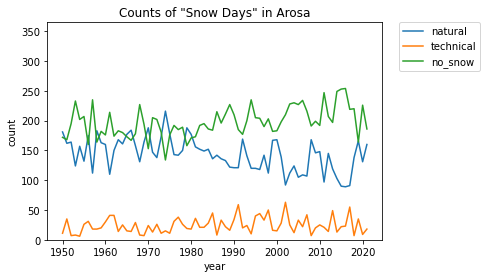

In [14]:
import matplotlib.pyplot as plt

sns.lineplot(data=df2, x="year", y="count", hue="snow_type").set(title='Counts of "Snow Days" in Arosa')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0, 365])

In [15]:
import pandas as pd
import numpy as np
colnames=['stn', 'time', '1', 'snow'] 
df_meiringen = pd.read_csv("meiringen_only.txt", sep=";",
                           index_col=False,
                           header=None,
                           names=colnames)[['stn', 'time', 'snow']]
df_meiringen['time'] = pd.to_datetime(df_meiringen['time'], format='%Y%m%d')
df_meiringen = pd.merge(df_meiringen, df_arosa['time'], on='time', how='right')

In [16]:
df_meiringen["snow"] = df_meiringen['snow'].replace('-', np.nan)
df_meiringen["snow"] = pd.to_numeric(df_meiringen["snow"])

[Text(0.5, 1.0, 'Snow Levels in Meiringen')]

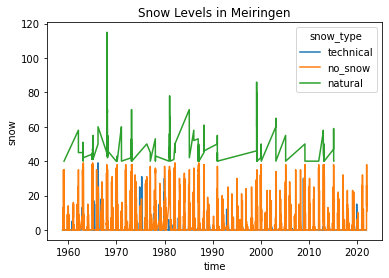

In [17]:
df_meiringen = df_meiringen[(df_meiringen['time'] > '1950-01-01') & (df_meiringen['time'] < '2021-12-31')]
df_meiringen.loc[df_meiringen["snow"] >= 40, "snow_type"] = "natural"
df_meiringen.loc[df_meiringen["snow"] < 40, "snow_type"] = "no_snow"
df_meiringen.loc[(df_meiringen["snow"] < 40) & (df_arosa["snow"]>=20), "snow_type"] = "technical"
sns.lineplot(data=df_meiringen, x='time', y='snow', hue='snow_type').set(title='Snow Levels in Meiringen')

(0.0, 365.0)

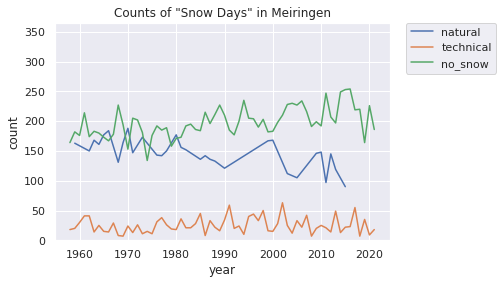

In [18]:
df_meiringen['year'] = df_meiringen['time'].dt.year
df_meiringen_agg = df_meiringen.groupby(["year", "snow_type"]).size()

year_df_meiringen = df_meiringen_agg.reset_index()
df3 = df_meiringen.merge(year_df).rename(columns={0:'count'})
df3 = df3[["year", "snow_type", "count"]]
df3 = df3.drop_duplicates()
sns.set(style="darkgrid")
sns.lineplot(data=df3, x="year", y="count", hue="snow_type", hue_order = ['natural', 'technical', 'no_snow']).set(title='Counts of "Snow Days" in Meiringen')
import matplotlib.pyplot as plt
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0, 365])

(0.0, 365.0)

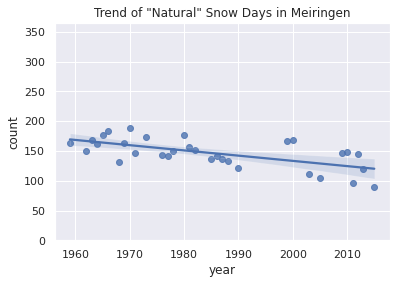

In [19]:
df4 = df3.loc[(df3['snow_type'] == 'natural')]
sns.regplot(x='year', y="count", data=df4).set(title='Trend of "Natural" Snow Days in Meiringen')
plt.ylim([0, 365])

(0.0, 365.0)

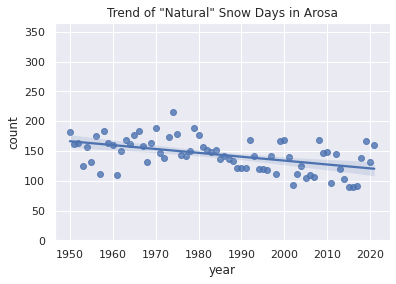

In [20]:
df4 = df2.loc[(df2['snow_type'] == 'natural')]
sns.regplot(x='year', y="count", data=df4).set(title='Trend of "Natural" Snow Days in Arosa')
plt.ylim([0, 365])